In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tahai\AppData\Local\Temp\ipykernel_15100\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("housing.csv")  # read csv data and store it into a dataframe

In [3]:
data.info() # provides a concise summary of a dataframe. We can see that there are some null values in the total bedrooms column. Since there arent that many null values, we will just drop the rows containing them


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True) #drop any rows in the dataframe with even one null value. Modifies inplace

In [5]:
data.info() #now we can see that the null values are gone

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1) #All the values except 'median_house_value' are what we are goign to train on
y = data['median_house_value']  # 'median_house_value' is what we want to predict using machine learning

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Create seperate train and test datasets

In [8]:
train_data = X_train.join(y_train) # Create a complete training dataset. Combines based on common indices

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12390,-116.44,33.74,5.0,846.0,249.0,117.0,67.0,7.9885,INLAND,403300.0
11214,-117.91,33.82,32.0,1408.0,307.0,1331.0,284.0,3.7014,<1H OCEAN,179600.0
3971,-118.58,34.19,35.0,2329.0,399.0,966.0,336.0,3.8839,<1H OCEAN,224900.0
13358,-117.61,34.04,8.0,4116.0,766.0,1785.0,745.0,3.1672,INLAND,150200.0
988,-121.86,37.70,13.0,9621.0,1344.0,4389.0,1391.0,6.6827,INLAND,313700.0
...,...,...,...,...,...,...,...,...,...,...
3662,-118.38,34.25,38.0,983.0,185.0,513.0,170.0,4.8816,<1H OCEAN,231500.0
14732,-117.02,32.81,26.0,1998.0,301.0,874.0,305.0,5.4544,<1H OCEAN,180900.0
16058,-122.49,37.76,52.0,1792.0,305.0,782.0,287.0,4.0391,NEAR BAY,332700.0
6707,-118.15,34.14,27.0,1499.0,426.0,755.0,414.0,3.8750,<1H OCEAN,258300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

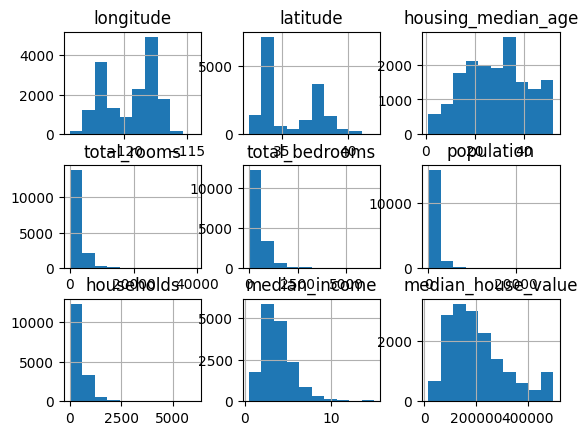

In [10]:
train_data.hist()

In [11]:
numeric_data = train_data.select_dtypes(include=[np.number]) # Creating a new dataset 'numeric_data' with only the numeric datatypes
corr_matrix = numeric_data.corr() # A matrix with all correlation values between all pars of numeric fields

In [12]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924710,-0.103642,0.044318,0.069334,0.097529,0.054852,-0.016018,-0.043630
latitude,-0.924710,1.000000,0.007825,-0.035261,-0.065960,-0.106548,-0.069899,-0.078715,-0.145993
housing_median_age,-0.103642,0.007825,1.000000,-0.362495,-0.324781,-0.301916,-0.306993,-0.124138,0.100925
total_rooms,0.044318,-0.035261,-0.362495,1.000000,0.931237,0.864408,0.919232,0.199789,0.132022
total_bedrooms,0.069334,-0.065960,-0.324781,0.931237,1.000000,0.885152,0.978566,-0.004929,0.048961
population,0.097529,-0.106548,-0.301916,0.864408,0.885152,1.000000,0.915534,0.010363,-0.025150
households,0.054852,-0.069899,-0.306993,0.919232,0.978566,0.915534,1.000000,0.016691,0.064427
median_income,-0.016018,-0.078715,-0.124138,0.199789,-0.004929,0.010363,0.016691,1.000000,0.686716
median_house_value,-0.043630,-0.145993,0.100925,0.132022,0.048961,-0.025150,0.064427,0.686716,1.000000


<Axes: >

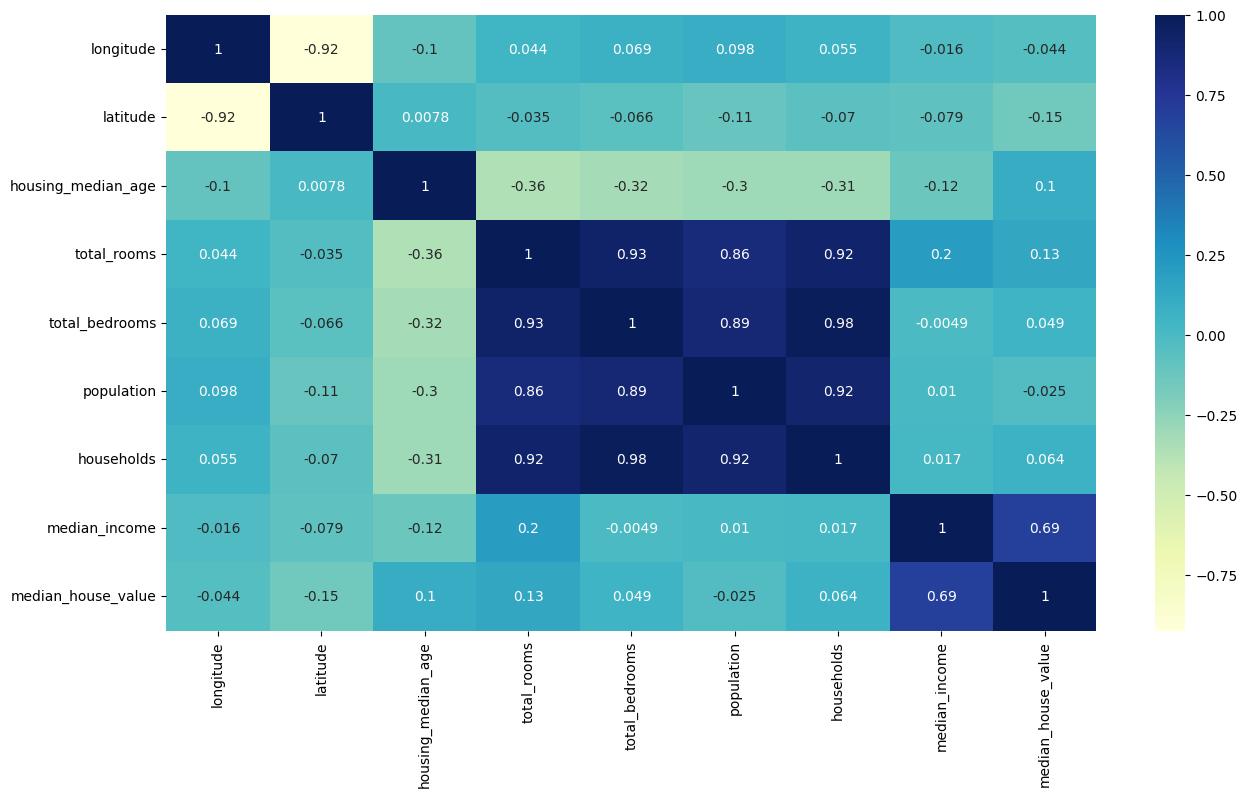

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True,cmap= "YlGnBu") #Creating a figure with the correlation values

In [14]:
# A lot of the data in certain fields has skewed distributions. This is not ideal for training an ML model. So we take the natural logarithm of all values in these colummns. This preserves corraltion but creates a normal distribution.
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

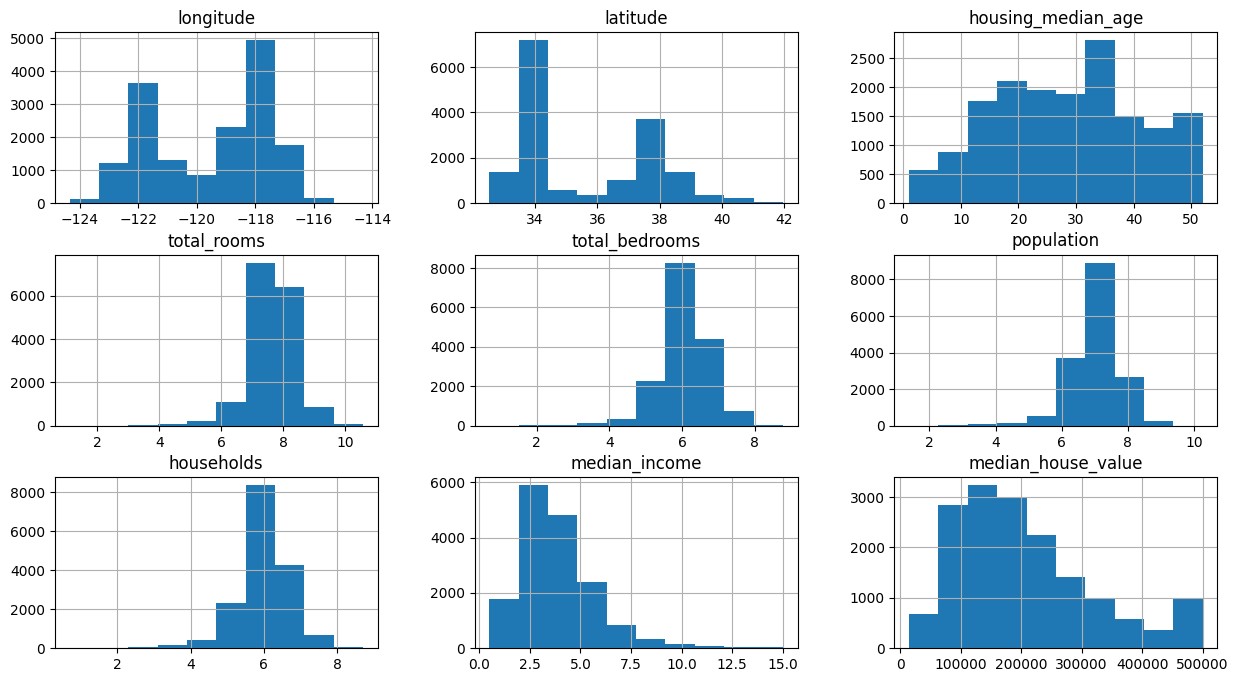

In [15]:
train_data.hist(figsize=(15,8))  #now we can see the normal distributions in a histogram

In [16]:
dummies = pd.get_dummies(train_data.ocean_proximity)

In [17]:
one_hot_encoded = dummies.astype(int)#Ocean_proximity is categorical data. We now create one_hot_encoded values from this data.
train_data = train_data.join(one_hot_encoded).drop(['ocean_proximity'], axis = 1) #join the one-hot-encoded dataset with the train_data and drop the ocea-proximity encoded data

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12390,-116.44,33.74,5.0,6.741701,5.521461,4.770685,4.219508,7.9885,403300.0,0,1,0,0,0
11214,-117.91,33.82,32.0,7.250636,5.730100,7.194437,5.652489,3.7014,179600.0,1,0,0,0,0
3971,-118.58,34.19,35.0,7.753624,5.991465,6.874198,5.820083,3.8839,224900.0,1,0,0,0,0
13358,-117.61,34.04,8.0,8.322880,6.642487,7.487734,6.614726,3.1672,150200.0,0,1,0,0,0
988,-121.86,37.70,13.0,9.171807,7.204149,8.387085,7.238497,6.6827,313700.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,-118.38,34.25,38.0,6.891626,5.225747,6.242223,5.141664,4.8816,231500.0,1,0,0,0,0
14732,-117.02,32.81,26.0,7.600402,5.710427,6.774224,5.723585,5.4544,180900.0,1,0,0,0,0
16058,-122.49,37.76,52.0,7.491645,5.723585,6.663133,5.662960,4.0391,332700.0,0,0,0,1,0
6707,-118.15,34.14,27.0,7.313220,6.056784,6.628041,6.028279,3.8750,258300.0,1,0,0,0,0


<Axes: >

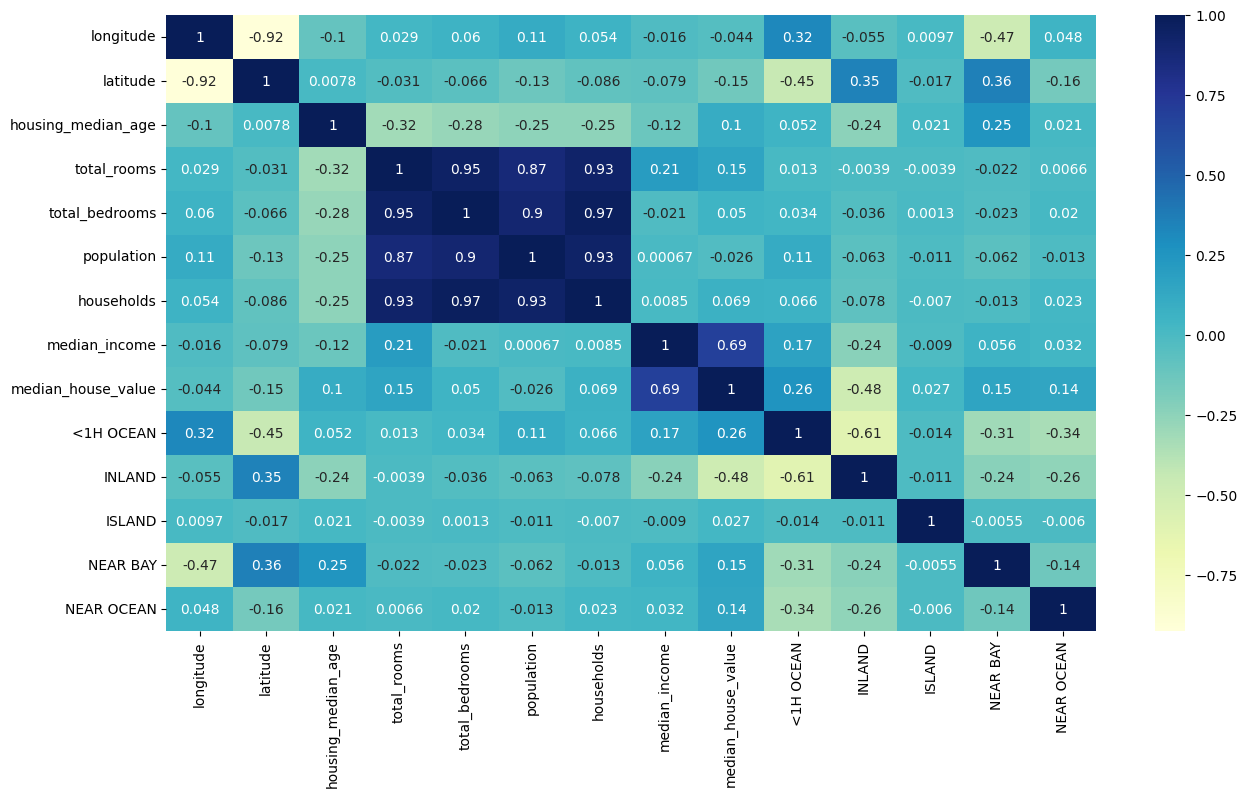

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap= "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

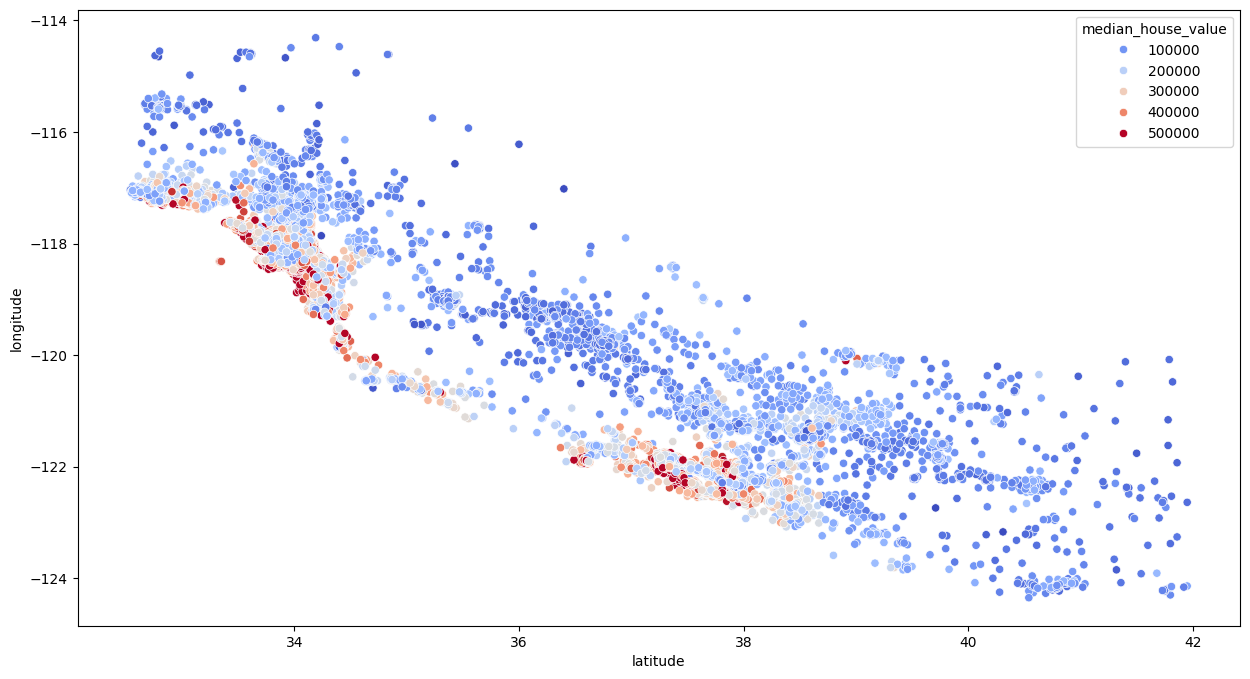

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm") #create this cool little figure that maps latitide and longitude of certain neightborhods and, among them, highlights the neighborhoods with high prices

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms'] #We add a field to train_data called bedroom ratio. How many bedrooms are there for every room in the neighborhood
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households'] #How many rooms are ther per houshold?

<Axes: >

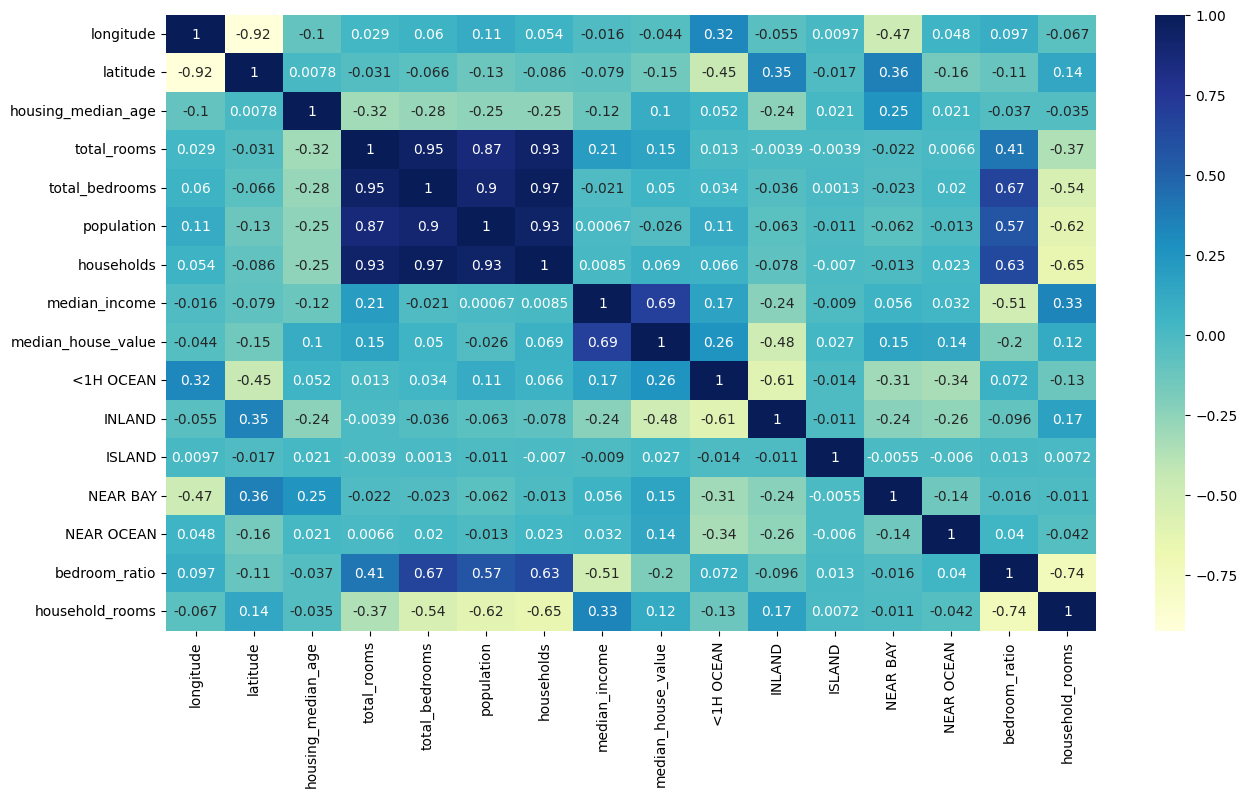

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap= "YlGnBu")

In [23]:
from sklearn.linear_model import LinearRegression

X_train, y_train  = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12390,-116.44,33.74,5.0,6.741701,5.521461,4.770685,4.219508,7.9885,403300.0,0,1,0,0,0,0.819001,1.597746
11214,-117.91,33.82,32.0,7.250636,5.730100,7.194437,5.652489,3.7014,179600.0,1,0,0,0,0,0.790289,1.282733
3971,-118.58,34.19,35.0,7.753624,5.991465,6.874198,5.820083,3.8839,224900.0,1,0,0,0,0,0.772731,1.332219
13358,-117.61,34.04,8.0,8.322880,6.642487,7.487734,6.614726,3.1672,150200.0,0,1,0,0,0,0.798100,1.258235
988,-121.86,37.70,13.0,9.171807,7.204149,8.387085,7.238497,6.6827,313700.0,0,1,0,0,0,0.785467,1.267087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,-118.38,34.25,38.0,6.891626,5.225747,6.242223,5.141664,4.8816,231500.0,1,0,0,0,0,0.758275,1.340349
14732,-117.02,32.81,26.0,7.600402,5.710427,6.774224,5.723585,5.4544,180900.0,1,0,0,0,0,0.751332,1.327909
16058,-122.49,37.76,52.0,7.491645,5.723585,6.663133,5.662960,4.0391,332700.0,0,0,0,1,0,0.763996,1.322920
6707,-118.15,34.14,27.0,7.313220,6.056784,6.628041,6.028279,3.8750,258300.0,1,0,0,0,0,0.828197,1.213152


In [25]:
LinearRegression()

LinearRegression()

In [26]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_dummies = pd.get_dummies(test_data.ocean_proximity)

test_one_hot_encoded = test_dummies.astype(int)
test_data = test_data.join(test_one_hot_encoded).drop(['ocean_proximity'], axis = 1) 

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms'] 
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households'] 

In [33]:
new_X_test, new_y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']
new_X_test
X_train
reg.score(new_X_test, new_y_test)


0.6746783446725809

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()


In [37]:
forest.fit(X_train, y_train)
forest.score(new_X_test, new_y_test)

0.8206810649678673

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2,4,6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score= True)

grid_search.fit(new_X_test, new_y_test)